In [1]:
# First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Now we need to read in the data
df = pd.read_csv(r'movies.csv')

In [2]:
# Now let's take a look at the data

df


name  ... runtime
0                                        The Shining  ...   146.0
1                                    The Blue Lagoon  ...   104.0
2     Star Wars: Episode V - The Empire Strikes Back  ...   124.0
3                                          Airplane!  ...    88.0
4                                         Caddyshack  ...    98.0
...                                              ...  ...     ...
7663                                    More to Life  ...    90.0
7664                                     Dream Round  ...    90.0
7665                                   Saving Mbango  ...     NaN
7666                                    It's Just Us  ...   120.0
7667                                       Tee em el  ...   102.0

[7668 rows x 15 columns]

In [3]:
# We need to see if we have any missing data
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [6]:
#1. Missing data. There are missing values opposed to this video so you will need to fix that. There are many ways to handle missing values but for the sake of time, I decided to drop all rows that have missing data. You will have about 71% of your data remaining. You will need to run the following if your dataframe is named df.
df = df.dropna()


In [7]:
# We need to see if we have any missing data
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 0%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 0%
gross - 0%
company - 0%
runtime - 0%


In [4]:
# Data Types for our columns

print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


In [8]:
df['budget']=df['budget'].astype('int64')
df['gross']=df['gross'].astype('int64')

In [9]:
#2. Extracting the year is different as the formatting is different. Running the following should extract the correct year.

df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)

In [11]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)


name  ... yearcorrect
5445                                      Avatar  ...        2009
7445                           Avengers: Endgame  ...        2019
3045                                     Titanic  ...        1997
6663  Star Wars: Episode VII - The Force Awakens  ...        2015
7244                      Avengers: Infinity War  ...        2018
...                                          ...  ...         ...
5640                                 Tanner Hall  ...        2015
2434                  Philadelphia Experiment II  ...        1994
3681                                Ginger Snaps  ...        2001
272                                     Parasite  ...        1982
3203                                  Trojan War  ...        1997

[5421 rows x 16 columns]

In [12]:
#Drop any duplicates
df.drop_duplicates()

name  ... yearcorrect
0                                        The Shining  ...        1980
1                                    The Blue Lagoon  ...        1980
2     Star Wars: Episode V - The Empire Strikes Back  ...        1980
3                                          Airplane!  ...        1980
4                                         Caddyshack  ...        1980
...                                              ...  ...         ...
7648                               Bad Boys for Life  ...        2020
7649                              Sonic the Hedgehog  ...        2020
7650                                        Dolittle  ...        2020
7651                            The Call of the Wild  ...        2020
7652                               The Eight Hundred  ...        2020

[5421 rows x 16 columns]

In [ ]:
#Budget High Correlation
#Company high Correlation educated guesses

Text(0, 0.5, 'Budget fior Film')

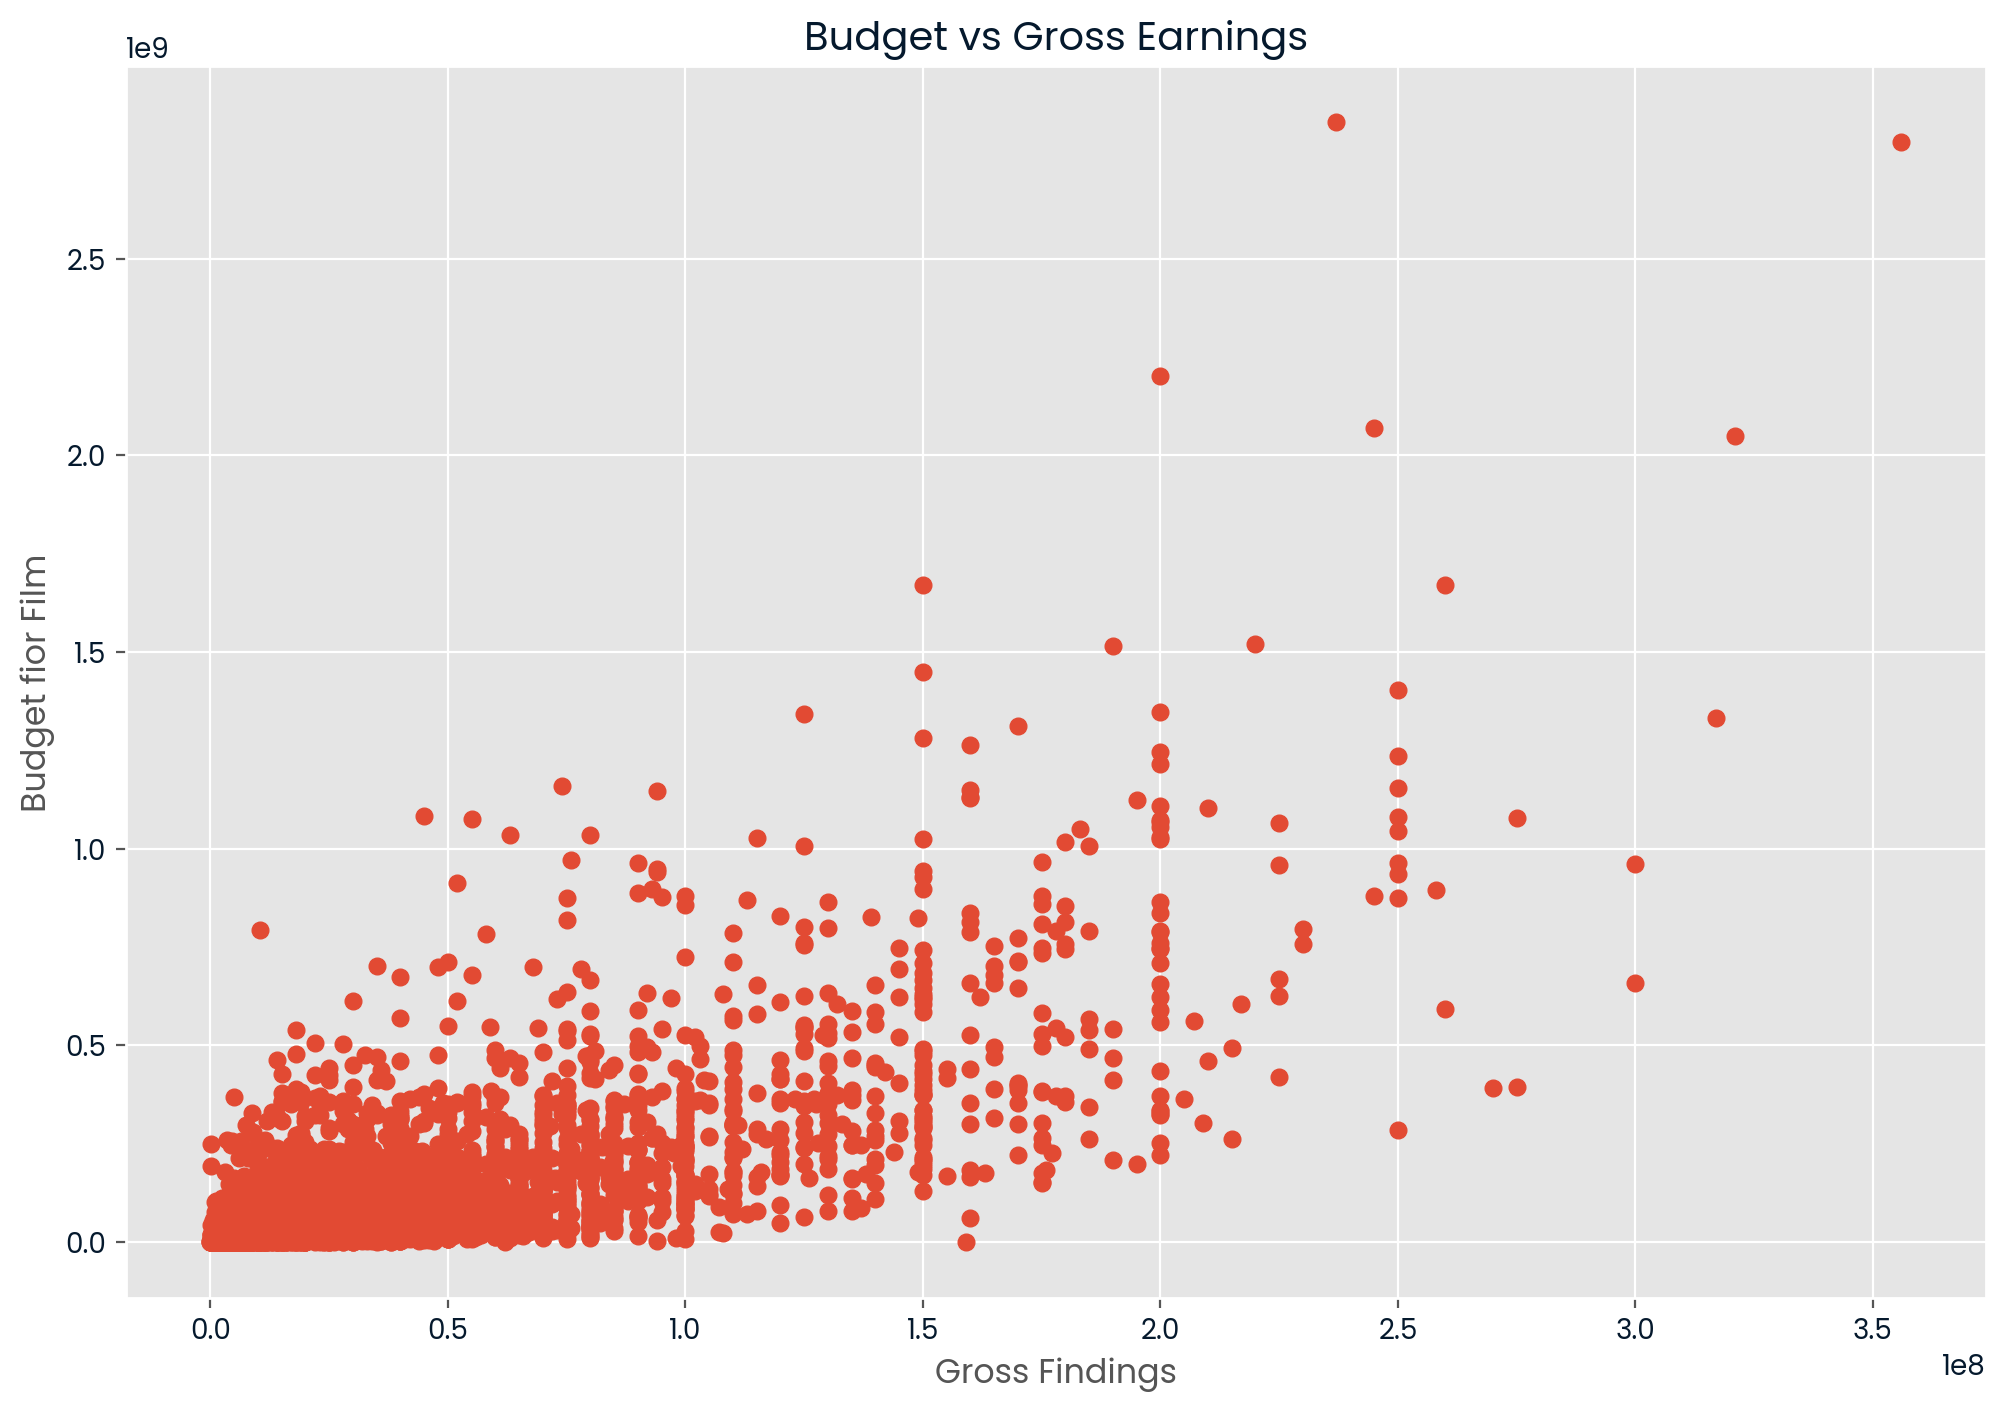

In [17]:
#Scatterplot with budget vs gross
plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Findings')
plt.ylabel('Budget fior Film')


In [18]:
df.head()

name rating  ... runtime  yearcorrect
0                                     The Shining      R  ...   146.0         1980
1                                 The Blue Lagoon      R  ...   104.0         1980
2  Star Wars: Episode V - The Empire Strikes Back     PG  ...   124.0         1980
3                                       Airplane!     PG  ...    88.0         1980
4                                      Caddyshack      R  ...    98.0         1980

[5 rows x 16 columns]

<Axes: xlabel='budget', ylabel='gross'>

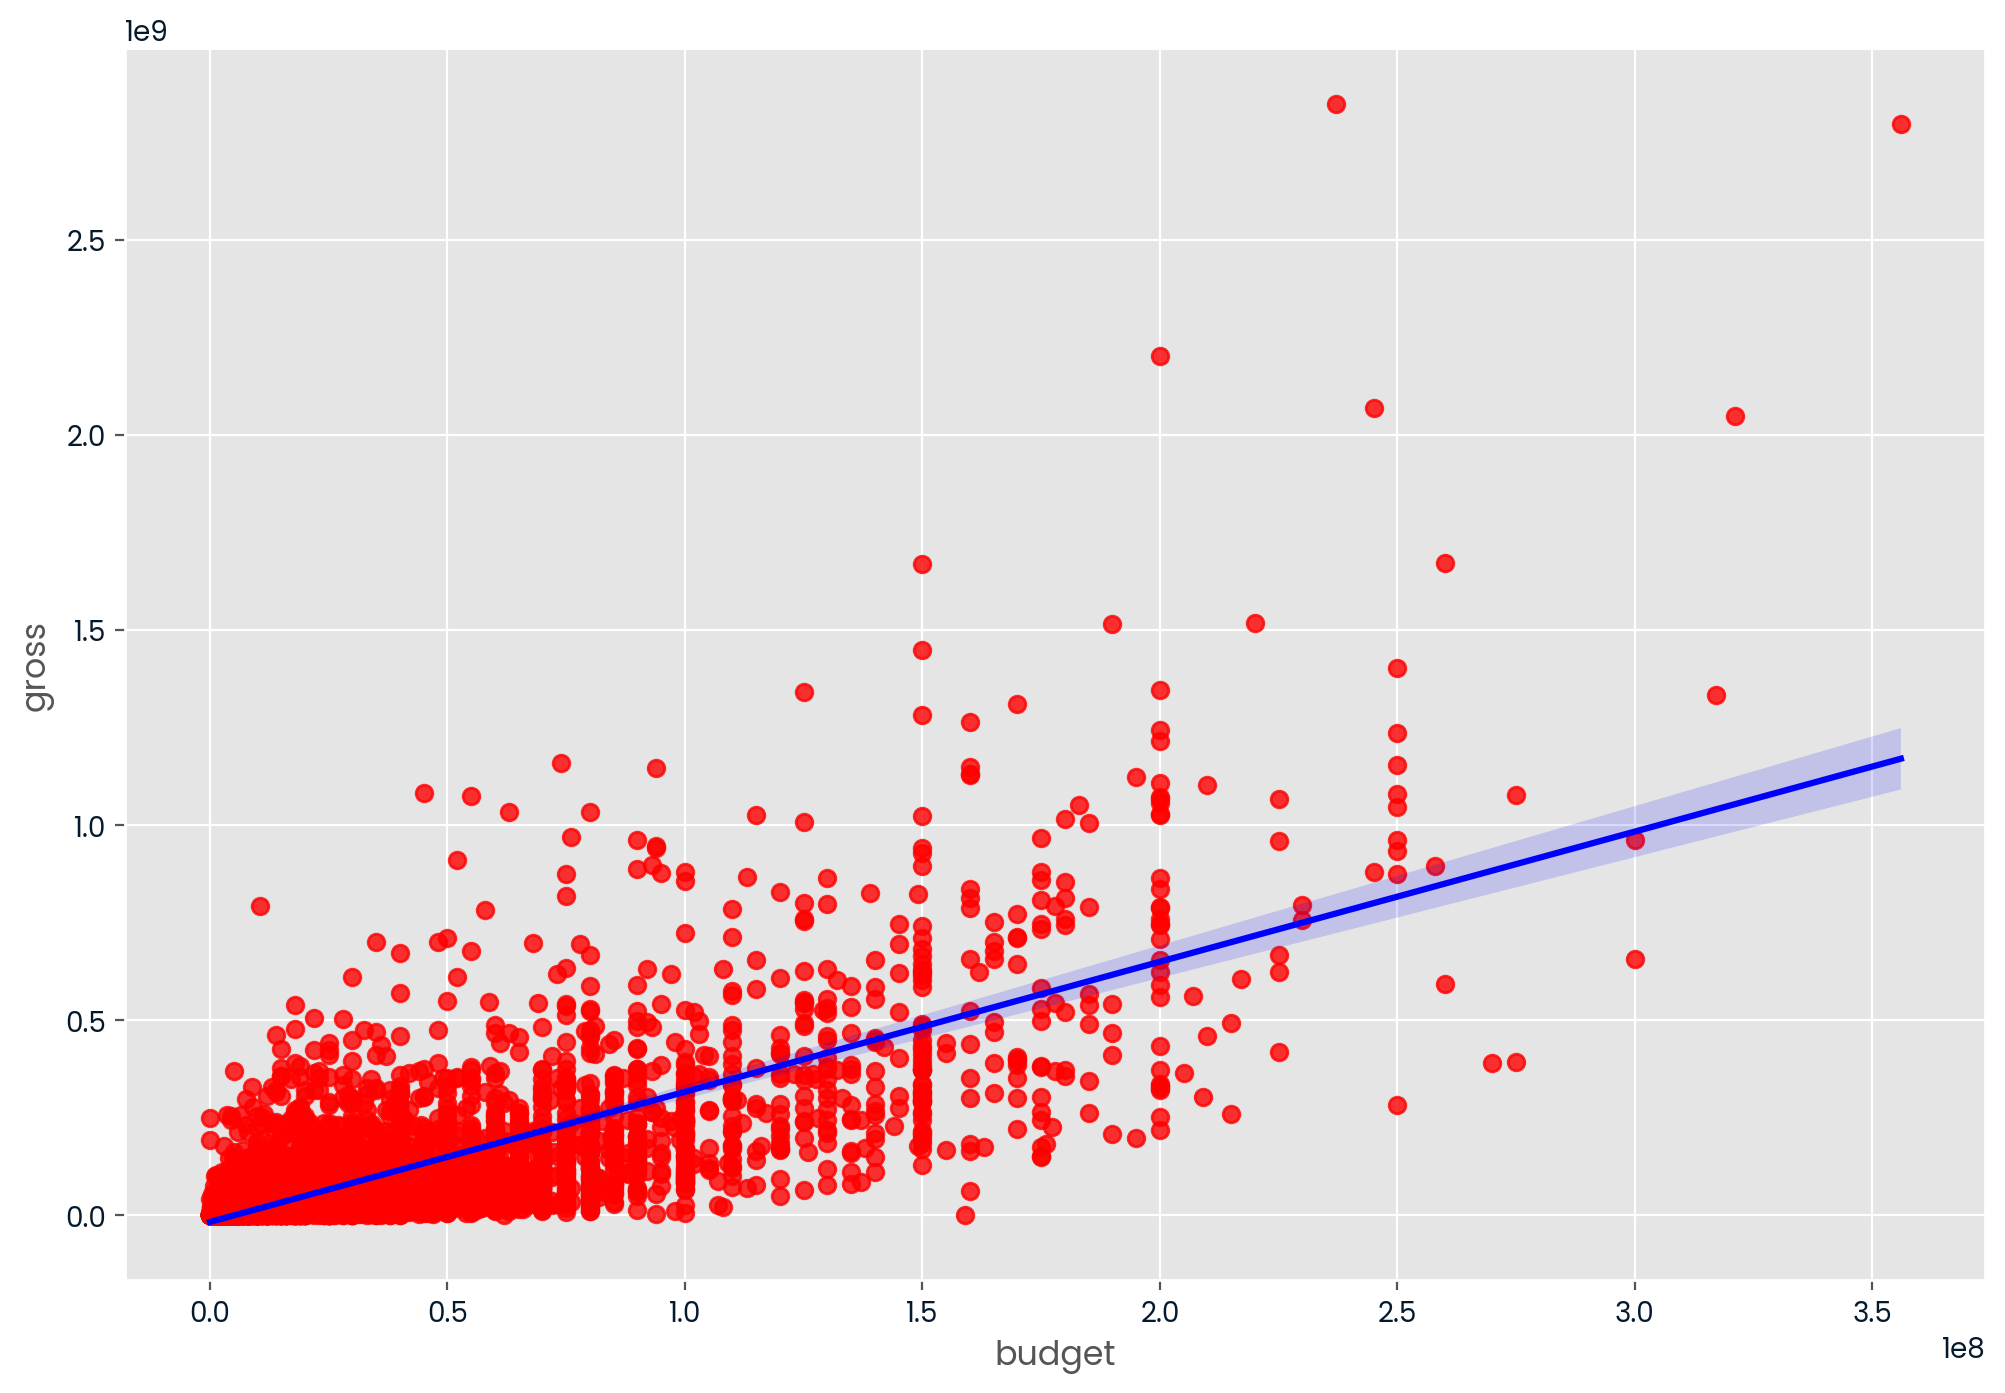

In [20]:
#Plot budget vs gross using seaborn
sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})

In [22]:
#Looking at Correlation
# Select only the numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
correlation_matrix


year     score     votes  ...     gross   runtime  yearcorrect
year         1.000000  0.056386  0.206021  ...  0.274321  0.075077     0.998726
score        0.056386  1.000000  0.474256  ...  0.222556  0.414068     0.061923
votes        0.206021  0.474256  1.000000  ...  0.614751  0.352303     0.203098
budget       0.327722  0.072001  0.439675  ...  0.740247  0.318695     0.320312
gross        0.274321  0.222556  0.614751  ...  1.000000  0.275796     0.268721
runtime      0.075077  0.414068  0.352303  ...  0.275796  1.000000     0.075294
yearcorrect  0.998726  0.061923  0.203098  ...  0.268721  0.075294     1.000000

[7 rows x 7 columns]

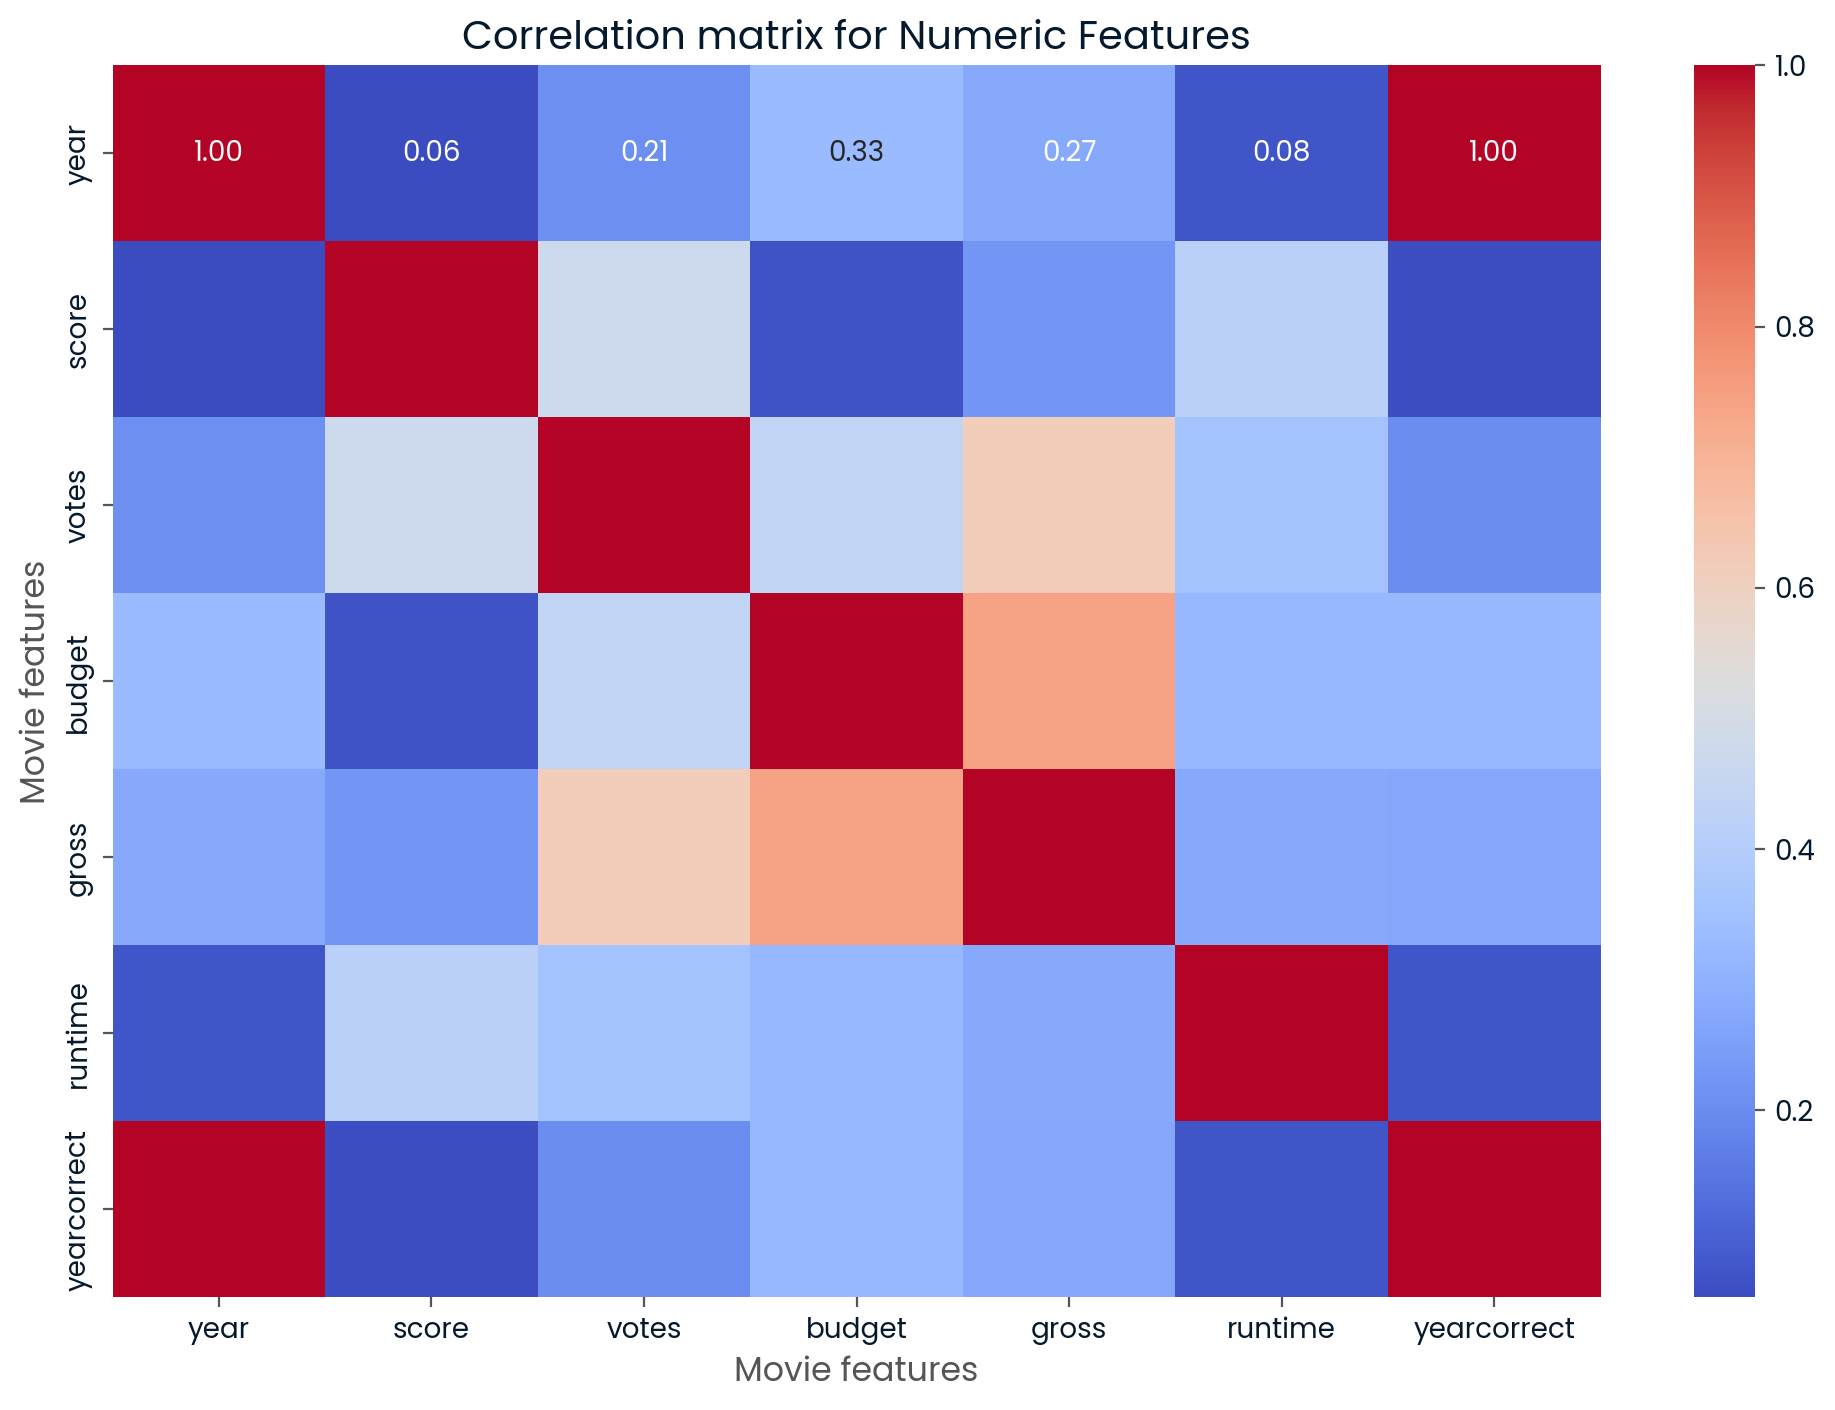

In [26]:
plt.figure(figsize=(12, 8))  # Increase figure size for better readability
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()


In [29]:
# Convert all object (string) columns in the DataFrame to categorical data,then convert the categories to numeric codes for numerical analysis
df_numerized = df


for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

name  rating  genre  year  ...      gross  company  runtime  yearcorrect
0     4692       6      6  1980  ...   46998772     1426    146.0         1980
1     3929       6      1  1980  ...   58853106      452    104.0         1980
2     3641       4      0  1980  ...  538375067      945    124.0         1980
3      204       4      4  1980  ...   83453539     1108     88.0         1980
4      732       6      4  1980  ...   39846344     1083     98.0         1980
...    ...     ...    ...   ...  ...        ...      ...      ...          ...
7648   415       6      0  2020  ...  426505244      452    124.0         2020
7649  3556       4      0  2020  ...  319715683     1108     99.0         2020
7650  1153       4      1  2020  ...  245487753     1397    101.0         2020
7651  3978       4      1  2020  ...  111105497       12    100.0         2020
7652  4090       3      0  2020  ...  461421559      228    149.0         2020

[5421 rows x 16 columns]

In [30]:
df_numerized.corr(method='pearson')


name    rating     genre  ...   company   runtime  yearcorrect
name         1.000000 -0.029234  0.010996  ...  0.021697  0.010850     0.025542
rating      -0.029234  1.000000  0.147796  ... -0.092357  0.140792     0.022021
genre        0.010996  0.147796  1.000000  ... -0.071334 -0.059237    -0.069147
year         0.025542  0.019499 -0.073167  ... -0.014333  0.075077     0.998726
released    -0.006152  0.018083  0.022142  ... -0.002407  0.008975    -0.005989
score        0.014450  0.065983  0.035106  ...  0.020656  0.414068     0.061923
votes        0.012615  0.006031 -0.135990  ...  0.118470  0.352303     0.203098
director     0.015246  0.014656 -0.008553  ... -0.008223  0.017433    -0.037371
writer       0.012880 -0.003149  0.017578  ... -0.003697 -0.017561    -0.025495
star        -0.006882  0.009196  0.003341  ...  0.014082  0.010108    -0.032687
country     -0.025490  0.008230 -0.009164  ...  0.048569 -0.034477    -0.073569
budget       0.023392 -0.203946 -0.368523  ...  0.170235  0.318695     0.320312
gross        0.005639 -0.181906 -0.244101  ...  0.149553  0.275796     0.268721
company      0.021697 -0.092357 -0.071334  ...  1.000000  0.037585    -0.018806
runtime      0.010850  0.140792 -0.059237  ...  0.037585  1.000000     0.075294
yearcorrect  0.025542  0.022021 -0.069147  ... -0.018806  0.075294     1.000000

[16 rows x 16 columns]

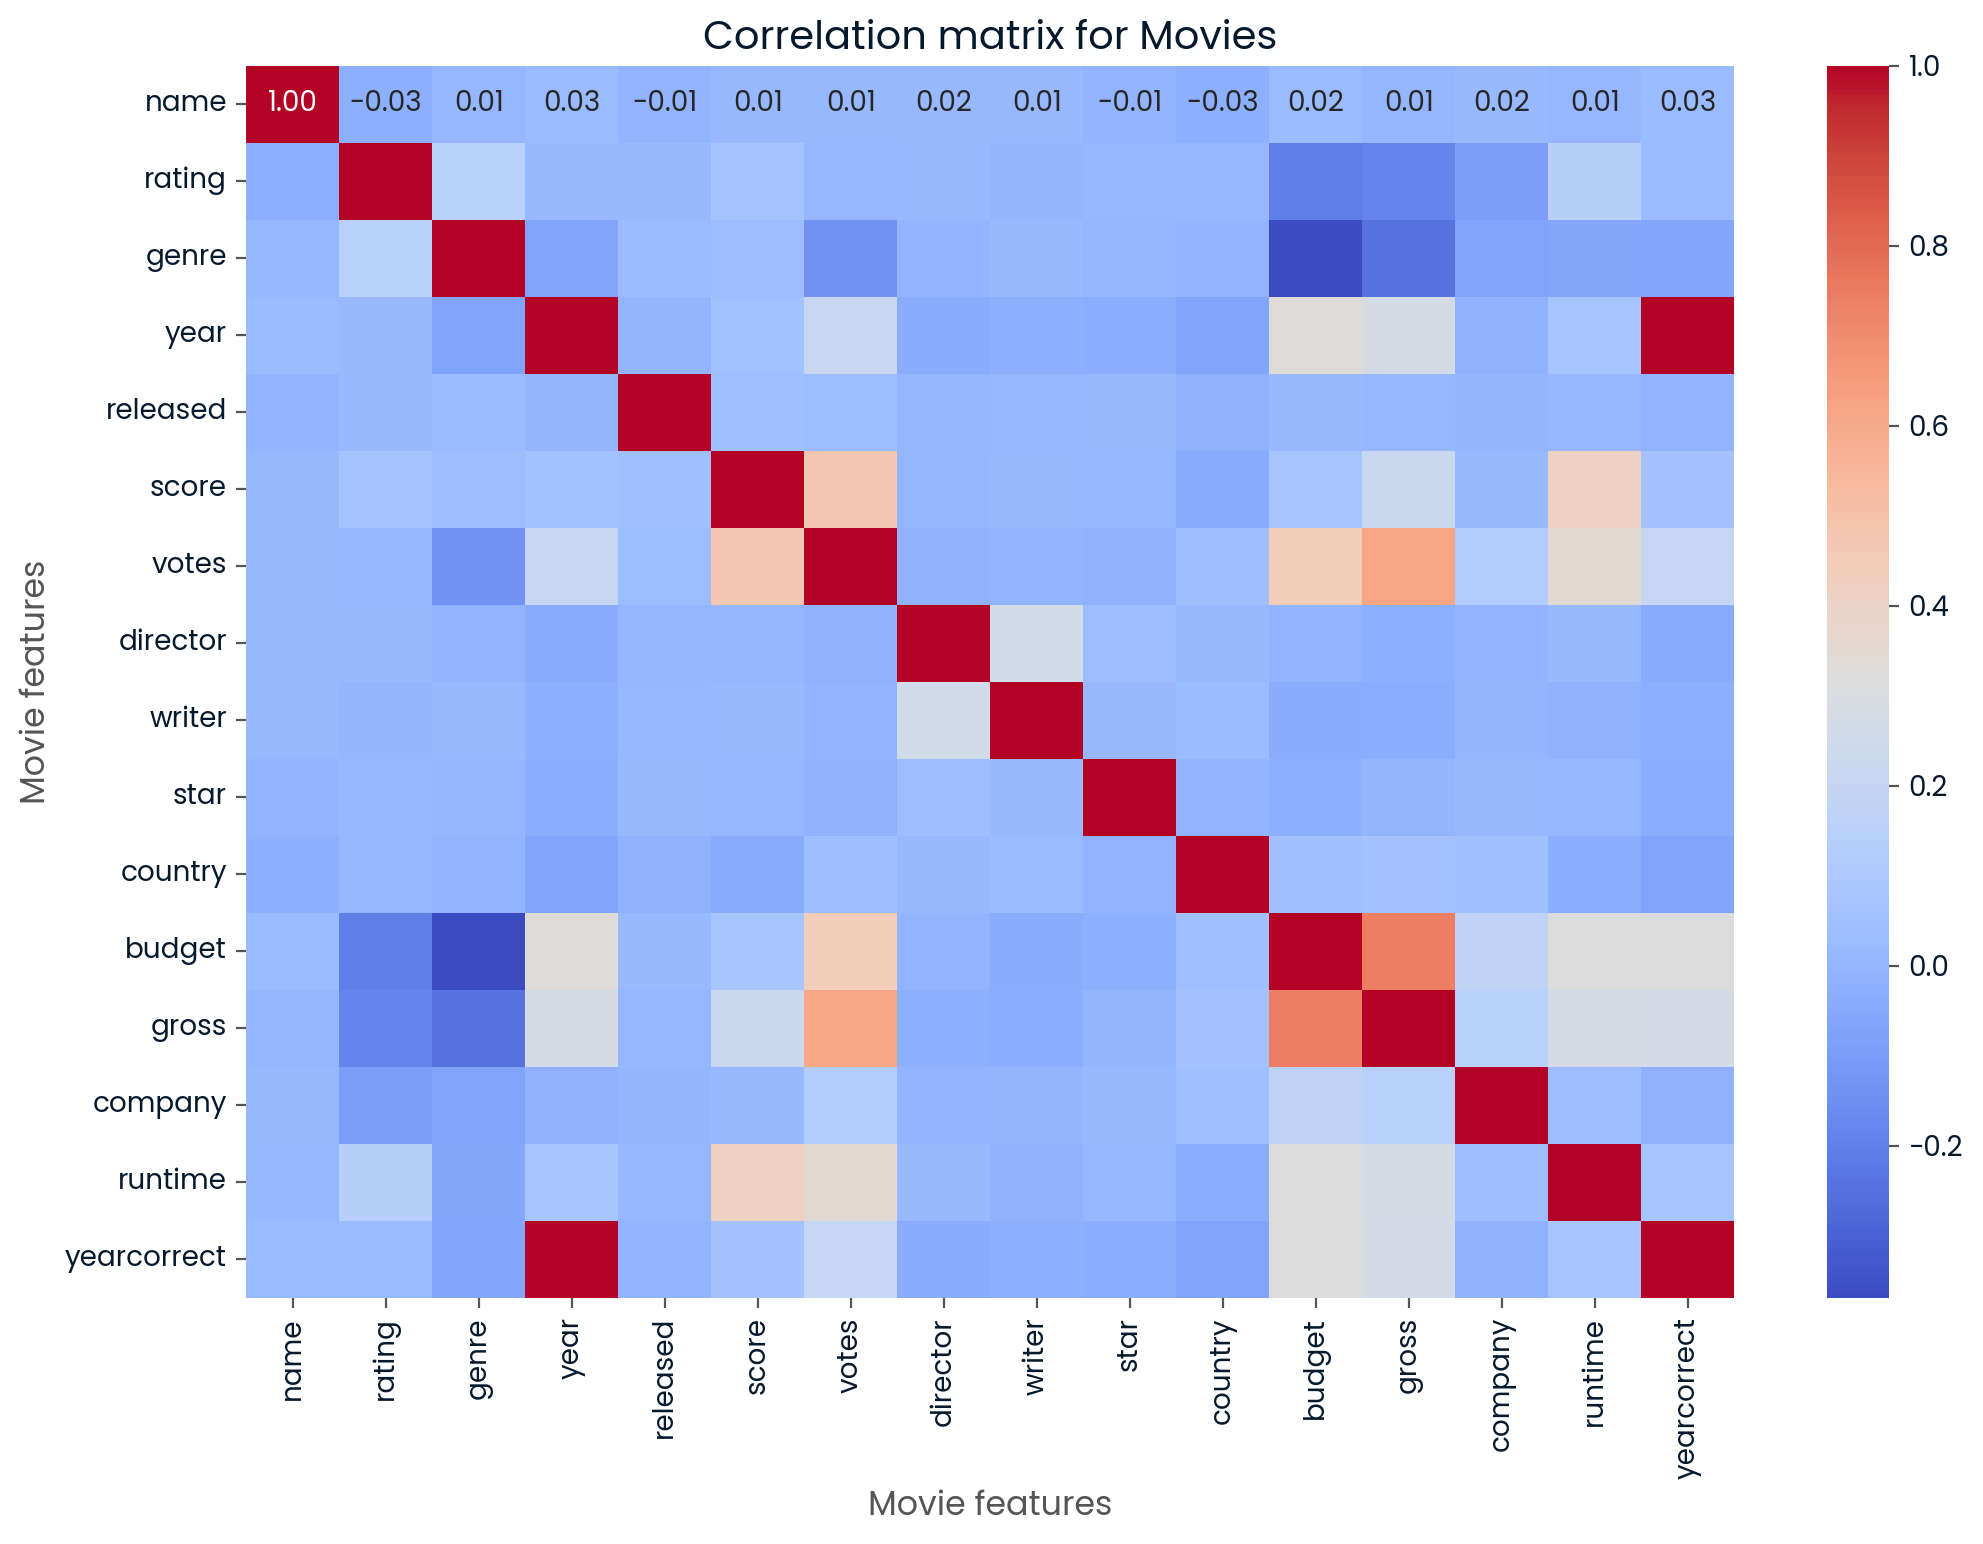

In [32]:
correlation_matrix_with_strings = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix_with_strings, annot = True,fmt=".2f", cmap='coolwarm')

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [33]:
#Unstacking for better reaDABILITY
corr_pairs = correlation_matrix_with_strings.unstack()
corr_pairs

name         name           1.000000
             rating        -0.029234
             genre          0.010996
             year           0.025542
             released      -0.006152
                              ...   
yearcorrect  budget         0.320312
             gross          0.268721
             company       -0.018806
             runtime        0.075294
             yearcorrect    1.000000
Length: 256, dtype: float64

In [39]:
sorted_pairs = corr_pairs.sort_values()
# Set pandas options to display all rows
#pd.set_option('display.max_rows', None)
# Reset the display option to its default value
#pd.reset_option('display.max_rows')

sorted_pairs

<bound method Series.sort_values of name         name           1.000000
             rating        -0.029234
             genre          0.010996
             year           0.025542
             released      -0.006152
                              ...   
yearcorrect  budget         0.320312
             gross          0.268721
             company       -0.018806
             runtime        0.075294
             yearcorrect    1.000000
Length: 256, dtype: float64>

In [44]:

# We can now take a look at the ones that have a high correlation (> 0.5)
sorted_pairs = corr_pairs.sort_values()

# Select the strong correlation pairs (absolute value > 0.5)
strong_pairs = sorted_pairs[sorted_pairs.abs() > 0.5]

# Print the strong pairs
print(strong_pairs)


gross        votes          0.614751
votes        gross          0.614751
gross        budget         0.740247
budget       gross          0.740247
year         yearcorrect    0.998726
yearcorrect  year           0.998726
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64


In [ ]:
#Votes and busdget have the highest correlation to gross earnings
#company had low correlation(assumption was wrong)